In [1]:
import math
import xarray as xr
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
level = np.linspace(0,5,6)
depth = 5 
time = np.linspace(0,364,365)
omg = (2*math.pi)/20
omg2 = (2*math.pi)/5
A1 = 1
A2 = 0.3*A1

u = np.full((int(len(time)),int(len(level))),np.nan)
u.shape

(365, 6)

In [3]:
level

array([0., 1., 2., 3., 4., 5.])

In [83]:
for t in range(len(time)): 
    for z in range(len(level)): 
        u[t,z] = A1*math.cos((math.pi/depth)*level[z])*math.sin(-omg*time[t]) + A2*math.cos((math.pi/depth)*level[z])*math.sin(-omg2*time[t])
        

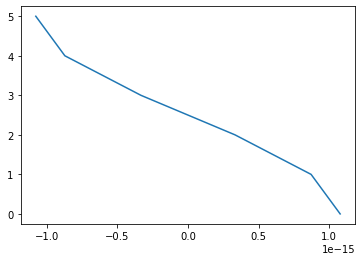

In [84]:
plt.plot(u[150,:],level)

In [85]:
u.shape

(365, 6)

In [86]:
cov = np.cov(u.T, bias=True) # uten .T ble den en 73x73 matrise 
values, vectors = np.linalg.eig(cov)
print('values: ', values) 
print('------------------------------------------------------')    
print('values[0]: ', values[0])
print('------------------------------------------------------') 
print('vectors: ', vectors) 
print('------------------------------------------------------')
print('vectors[0]: ', vectors[0]) 

order = values.argsort()[::-1]
values_, vectors_ = values[order], vectors[:, order]

print('-----------------------------------------------------------')
print('-----------------------------------------------------------')

print(cov.shape) 
print('cov :', cov)
print('------------------------------------------------------')    
print('values: ',values_) 
print('------------------------------------------------------')    
print('values[0]: ',values_[0]) 
print('------------------------------------------------------')    
print('vectors: ',vectors_) 
print('------------------------------------------------------') 
print('vectors[0]: ',vectors_[0]) 

values:  [ 1.89825874e+00 -2.13550030e-18  8.82630708e-16  3.51800225e-18
 -6.86904160e-17 -4.98819459e-17]
------------------------------------------------------
values[0]:  1.8982587412356358
------------------------------------------------------
vectors:  [[ 0.53452248  0.70546545  0.45856257 -0.00941265 -0.00401099 -0.01329774]
 [ 0.43243777 -0.04965461 -0.42089003 -0.11660513  0.71782196 -0.28730733]
 [ 0.16517653  0.04385392 -0.25659193 -0.83664547 -0.17926761 -0.23151328]
 [-0.16517653 -0.03573685  0.2442101  -0.43841485  0.50179227  0.65629088]
 [-0.43243777 -0.01806556  0.52419054 -0.30610039  0.44807258 -0.65788577]
 [-0.53452248  0.70450427 -0.46078002  0.02083221  0.00376176  0.01215994]]
------------------------------------------------------
vectors[0]:  [ 0.53452248  0.70546545  0.45856257 -0.00941265 -0.00401099 -0.01329774]
-----------------------------------------------------------
-----------------------------------------------------------
(6, 6)
cov : [[ 0.54235964  

In [87]:
print(values[0])
print('---------------------')
print(values_[0])

1.8982587412356358
---------------------
1.8982587412356358


In [88]:
print(values)
print('---------------------')
print(values_)

[ 1.89825874e+00 -2.13550030e-18  8.82630708e-16  3.51800225e-18
 -6.86904160e-17 -4.98819459e-17]
---------------------
[ 1.89825874e+00  8.82630708e-16  3.51800225e-18 -2.13550030e-18
 -4.98819459e-17 -6.86904160e-17]


In [89]:
print(vectors[0])
print('---------------------')
print(vectors_[0])

[ 0.53452248  0.70546545  0.45856257 -0.00941265 -0.00401099 -0.01329774]
---------------------
[ 0.53452248  0.45856257 -0.00941265  0.70546545 -0.01329774 -0.00401099]


In [90]:
print(vectors)
print('---------------------')
print(vectors_)

[[ 0.53452248  0.70546545  0.45856257 -0.00941265 -0.00401099 -0.01329774]
 [ 0.43243777 -0.04965461 -0.42089003 -0.11660513  0.71782196 -0.28730733]
 [ 0.16517653  0.04385392 -0.25659193 -0.83664547 -0.17926761 -0.23151328]
 [-0.16517653 -0.03573685  0.2442101  -0.43841485  0.50179227  0.65629088]
 [-0.43243777 -0.01806556  0.52419054 -0.30610039  0.44807258 -0.65788577]
 [-0.53452248  0.70450427 -0.46078002  0.02083221  0.00376176  0.01215994]]
---------------------
[[ 0.53452248  0.45856257 -0.00941265  0.70546545 -0.01329774 -0.00401099]
 [ 0.43243777 -0.42089003 -0.11660513 -0.04965461 -0.28730733  0.71782196]
 [ 0.16517653 -0.25659193 -0.83664547  0.04385392 -0.23151328 -0.17926761]
 [-0.16517653  0.2442101  -0.43841485 -0.03573685  0.65629088  0.50179227]
 [-0.43243777  0.52419054 -0.30610039 -0.01806556 -0.65788577  0.44807258]
 [-0.53452248 -0.46078002  0.02083221  0.70450427  0.01215994  0.00376176]]


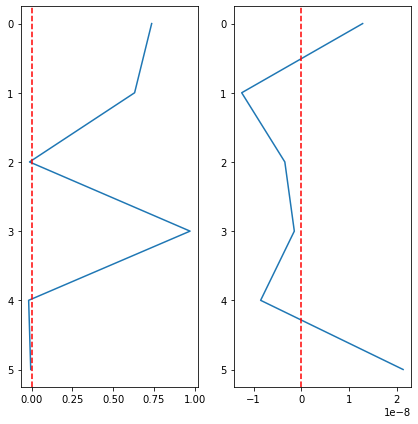

In [91]:
fig1, (ax1,ax2) = plt.subplots(1,2,figsize = (7,7))

ax1.plot(vectors_[0]*np.sqrt(values_[0]),level)
ax1.axvline(0, color='r', linestyle = '--')
ax1.invert_yaxis()

ax2.plot(vectors_[1]*np.sqrt(values_[1]),level)
ax2.axvline(0, color='r', linestyle = '--')
ax2.invert_yaxis()

In [92]:
cov = np.cov(u.T, bias=True) # uten .T ble den en 73x73 matrise 
values, vectors = np.linalg.eig(cov)
order = values.argsort()[::-1]
values_, vectors_ = values[order], vectors[order,:]

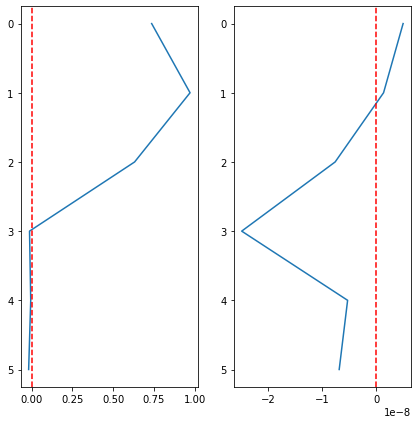

In [93]:
fig2, (ax1,ax2) = plt.subplots(1,2,figsize = (7,7))

ax1.plot(vectors_[0]*np.sqrt(values_[0]),level)
ax1.axvline(0, color='r', linestyle = '--')
ax1.invert_yaxis()

ax2.plot(vectors_[1]*np.sqrt(values_[1]),level)
ax2.axvline(0, color='r', linestyle = '--')
ax2.invert_yaxis()

In [94]:
print(values[0])
print('---------------------')
print(values_[0])

1.8982587412356358
---------------------
1.8982587412356358


In [95]:
print(vectors[0])
print('---------------------')
print(vectors_[0])

[ 0.53452248  0.70546545  0.45856257 -0.00941265 -0.00401099 -0.01329774]
---------------------
[ 0.53452248  0.70546545  0.45856257 -0.00941265 -0.00401099 -0.01329774]


# en bølge

In [96]:
for t in range(len(time)): 
    for z in range(len(level)): 
        u[t,z] = A1*math.cos((math.pi/depth)*level[z])*math.cos(-omg*time[t]) #+ A2*math.cos((math.pi/depth)*level[z])*math.cos(-omg2*time[t])
        

In [97]:
cov = np.cov(u.T, bias=True) # uten .T ble den en 73x73 matrise 
values, vectors = np.linalg.eig(cov)
order = values.argsort()[::-1]
values_, vectors_ = values[order], vectors[order,:]

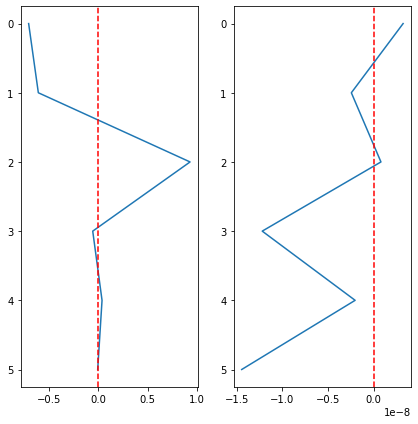

In [98]:
fig3, (ax1,ax2) = plt.subplots(1,2,figsize = (7,7))

ax1.plot(vectors_[0]*np.sqrt(values_[0]),level)
ax1.axvline(0, color='r', linestyle = '--')
ax1.invert_yaxis()

ax2.plot(vectors_[1]*np.sqrt(values_[1]),level)
ax2.axvline(0, color='r', linestyle = '--')
ax2.invert_yaxis()

In [99]:
cov = np.cov(u.T, bias=True) # uten .T ble den en 73x73 matrise 
values, vectors = np.linalg.eig(cov)
order = values.argsort()[::-1]
values_, vectors_ = values[order], vectors[order,:]

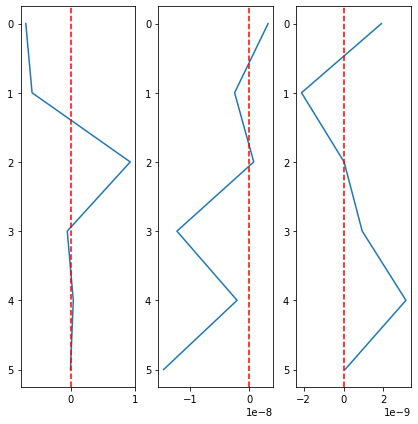

In [100]:
fig, (ax1,ax2, ax3) = plt.subplots(1,3,figsize = (7,7))

ax1.plot(vectors_[0]*np.sqrt(values_[0]),level)
ax1.axvline(0, color='r', linestyle = '--')
ax1.invert_yaxis()

ax2.plot(vectors_[1]*np.sqrt(values_[1]),level)
ax2.axvline(0, color='r', linestyle = '--')
ax2.invert_yaxis()

ax3.plot(vectors_[2]*np.sqrt(values_[2]),level)
ax3.axvline(0, color='r', linestyle = '--')
ax3.invert_yaxis()

# prøver manuelt 

In [101]:
u.shape

(365, 6)

In [102]:
u1 = u[:,0]
u2 = u[:,1]
u3 = u[:,2]
u4 = u[:,3]
u5 = u[:,4]
u6 = u[:,5]

U1 = np.zeros_like(time)
U2 = np.zeros_like(time)
U3 = np.zeros_like(time)
U4 = np.zeros_like(time)
U5 = np.zeros_like(time)
U6 = np.zeros_like(time)
U21 = np.zeros_like(time)
U31 = np.zeros_like(time)
U41 = np.zeros_like(time)
U51 = np.zeros_like(time)
U61 = np.zeros_like(time)
U23 = np.zeros_like(time)
U24 = np.zeros_like(time)
U25 = np.zeros_like(time)
U26 = np.zeros_like(time)
U34 = np.zeros_like(time)
U35 = np.zeros_like(time)
U36 = np.zeros_like(time)
U45 = np.zeros_like(time)
U46 = np.zeros_like(time)
U56 = np.zeros_like(time)


for t in range(len(time)): 
    U1 =+ u1[int(time[t])]**2
    U2 =+ u2[int(time[t])]**2
    U3 =+ u3[int(time[t])]**2
    U4 =+ u4[int(time[t])]**2
    U5 =+ u5[int(time[t])]**2
    U6 =+ u6[int(time[t])]**2
    U21 =+ u1[int(time[t])]*u2[int(time[t])]
    U31 =+ u1[int(time[t])]*u3[int(time[t])]
    U41 =+ u1[int(time[t])]*u4[int(time[t])]
    U51 =+ u1[int(time[t])]*u5[int(time[t])]
    U61 =+ u1[int(time[t])]*u6[int(time[t])]
    U23 =+ u2[int(time[t])]*u3[int(time[t])]
    U24 =+ u2[int(time[t])]*u4[int(time[t])]
    U25 =+ u2[int(time[t])]*u5[int(time[t])]
    U26 =+ u2[int(time[t])]*u6[int(time[t])]
    U34 =+ u3[int(time[t])]*u4[int(time[t])]
    U35 =+ u3[int(time[t])]*u5[int(time[t])]
    U36 =+ u3[int(time[t])]*u6[int(time[t])]
    U45 =+ u4[int(time[t])]*u5[int(time[t])]
    U46 =+ u4[int(time[t])]*u6[int(time[t])]
    U56 =+ u5[int(time[t])]*u6[int(time[t])]
    
U1 = U1/len(time) - u1.mean()**2
U2 = U2/len(time) - u2.mean()**2
U3 = U3/len(time) - u3.mean()**2
U4 = U4/len(time) - u4.mean()**2
U5 = U5/len(time) - u5.mean()**2
U6 = U6/len(time) - u6.mean()**2
U21 = U21/len(time) - u1.mean()*u2.mean()
U31 = U31/len(time) - u1.mean()*u3.mean()
U41 = U41/len(time) - u1.mean()*u4.mean()
U51 = U51/len(time) - u1.mean()*u5.mean()
U61 = U61/len(time) - u1.mean()*u6.mean()
U23 = U23/len(time) - u2.mean()*u3.mean()
U24 = U24/len(time) - u2.mean()*u4.mean()
U25 = U25/len(time) - u2.mean()*u5.mean()
U26 = U26/len(time) - u2.mean()*u6.mean()
U34 = U34/len(time) - u3.mean()*u4.mean()
U35 = U35/len(time) - u3.mean()*u5.mean()
U36 = U36/len(time) - u3.mean()*u6.mean()
U45 = U45/len(time) - u4.mean()*u5.mean()
U46 = U46/len(time) - u4.mean()*u6.mean()
U56 = U56/len(time) - u5.mean()*u6.mean()

In [103]:
cov = [[U1,U21,U31,U41,U51,U61],[U21,U2,U23,U24,U25,U26],[U31,U23,U3,U34,U35,U36],[U41,U24,U34,U4,U45,U46],[U51,U25,U35,U45,U5,U56],[U61,U26,U36,U46,U56,U6]]

In [104]:
cov = np.array(cov)
cov.shape

(6, 6)

In [105]:
values, vectors = np.linalg.eig(cov)
order = values.argsort()[::-1]
values_, vectors_ = values[order], vectors[order,:]

In [106]:
print(values)
print('---------------------')
print(values_)
print('---------------------')
print(vectors)
print('---------------------')
print(vectors_)

[ 0.00000000e+00  5.64352064e-04 -1.70535447e-20  2.41040694e-20
  1.06870281e-20 -1.15945499e-21]
---------------------
[ 5.64352064e-04  2.41040694e-20  1.06870281e-20  0.00000000e+00
 -1.15945499e-21 -1.70535447e-20]
---------------------
[[-0.84515425  0.53452248 -0.36342325 -0.37476955  0.20950938 -0.19059489]
 [ 0.27349766  0.43243777  0.63500332 -0.01638512 -0.14607834  0.0131229 ]
 [ 0.10446681  0.16517653 -0.38844118  0.22848577 -0.93431567  0.13130961]
 [-0.10446681 -0.16517653  0.03433524 -0.12947552 -0.11939932 -0.95289208]
 [-0.27349766 -0.43243777 -0.42491459 -0.80613735  0.06058699 -0.04392538]
 [-0.3380617  -0.53452248  0.36342325  0.37476955 -0.20950938  0.19059489]]
---------------------
[[ 0.27349766  0.43243777  0.63500332 -0.01638512 -0.14607834  0.0131229 ]
 [-0.10446681 -0.16517653  0.03433524 -0.12947552 -0.11939932 -0.95289208]
 [-0.27349766 -0.43243777 -0.42491459 -0.80613735  0.06058699 -0.04392538]
 [-0.84515425  0.53452248 -0.36342325 -0.37476955  0.2095093

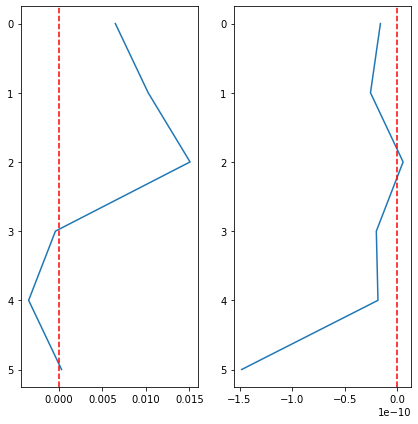

In [107]:
fig4, (ax1,ax2) = plt.subplots(1,2,figsize = (7,7))

ax1.plot(vectors_[0]*np.sqrt(values_[0]),level)
ax1.axvline(0, color='r', linestyle = '--')
ax1.invert_yaxis()

ax2.plot(vectors_[1]*np.sqrt(values_[1]),level)
ax2.axvline(0, color='r', linestyle = '--')
ax2.invert_yaxis()
